In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hp = pd.read_csv('Happiness1521.csv')
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1084 non-null   int64  
 1   Region      1084 non-null   object 
 2   Country     1084 non-null   object 
 3   Score       1084 non-null   float64
 4   Economy     1084 non-null   float64
 5   Social      1084 non-null   float64
 6   Health      1084 non-null   float64
 7   Freedom     1084 non-null   float64
 8   Generosity  1084 non-null   float64
 9   Corruption  1084 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 84.8+ KB


### 데이터 피처 분석
- Year : 연도
- Region : 구역(대륙)
- Country : 나라이름
- Score : 행복 점수
- Economy : GDP
- Social : 가족 및 친구
- Health : 건강(기대수명)
- Freedom : 자유도
- Generosity : 자선(기부)
- Corruption : 부패(정부)

In [3]:
spearman_cormatrix= hp.corr(method='spearman')
spearman_cormatrix

,Year,Score,Economy,Social,Health,Freedom,Generosity,Corruption
Year,1.000000,0.048606,0.021976,0.050588,0.024136,0.177784,-0.196758,-0.034471
Score,0.048606,1.000000,0.801784,0.616355,0.748739,0.554815,0.089054,0.281760
Economy,0.021976,0.801784,1.000000,0.556508,0.774275,0.376308,-0.039611,0.232594
Social,0.050588,0.616355,0.556508,1.000000,0.632395,0.354724,-0.018901,0.047232
Health,0.024136,0.748739,0.774275,0.632395,1.000000,0.350630,-0.012857,0.166818
Freedom,0.177784,0.554815,0.376308,0.354724,0.350630,1.000000,0.271232,0.401597
Generosity,-0.196758,0.089054,-0.039611,-0.018901,-0.012857,0.271232,1.000000,0.245945
Corruption,-0.034471,0.281760,0.232594,0.047232,0.166818,0.401597,0.245945,1.000000


In [4]:
import seaborn as sns

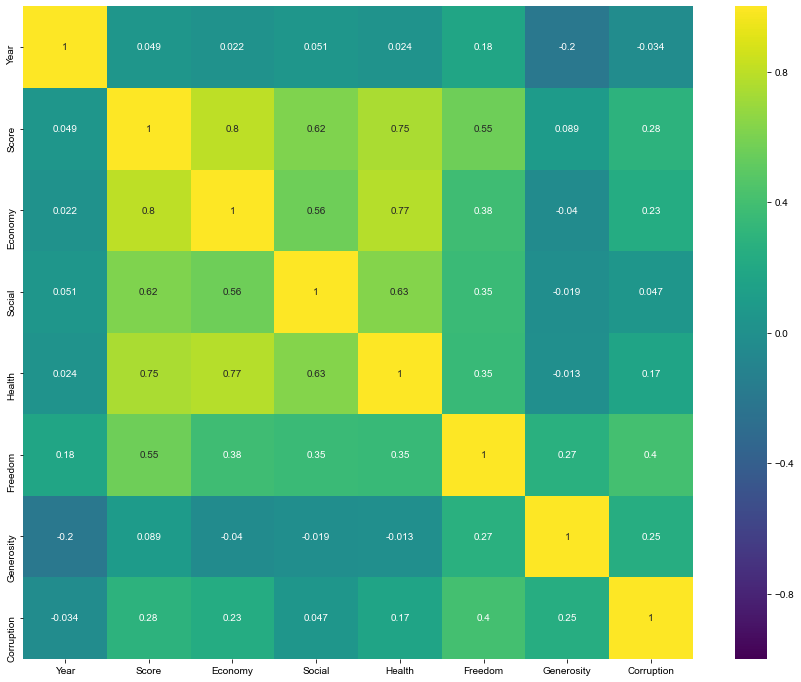

In [5]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
sns.set(font_scale = 1.3)
plt.show()

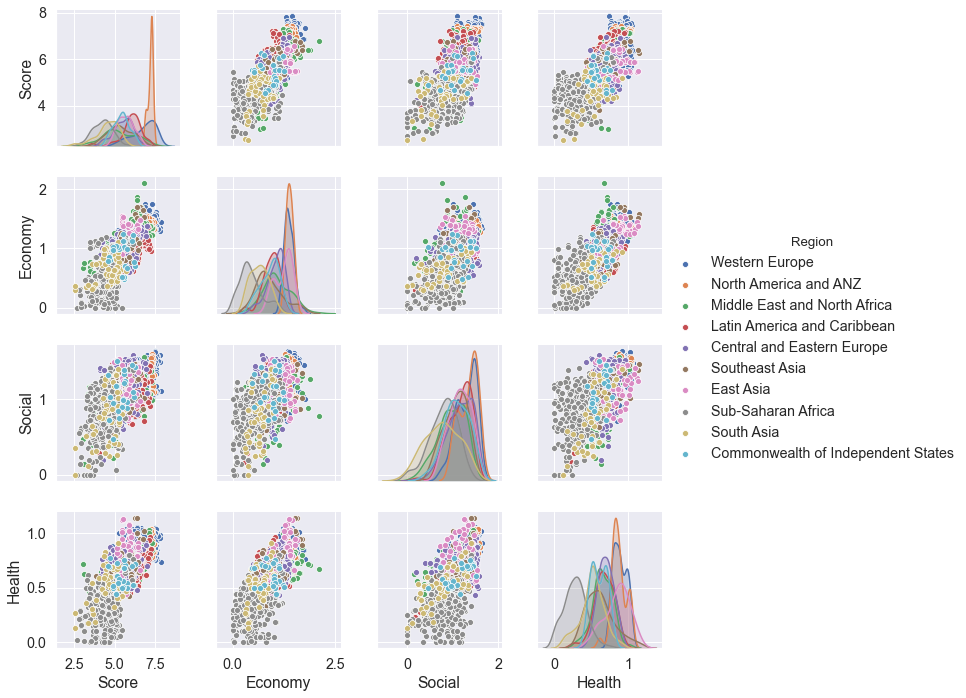

In [6]:
df = hp[['Region','Score', 'Economy', 'Social', 'Health']]

sns.pairplot(df, diag_kind='kde', hue='Region')
sns.set(font_scale = 2)
plt.show()

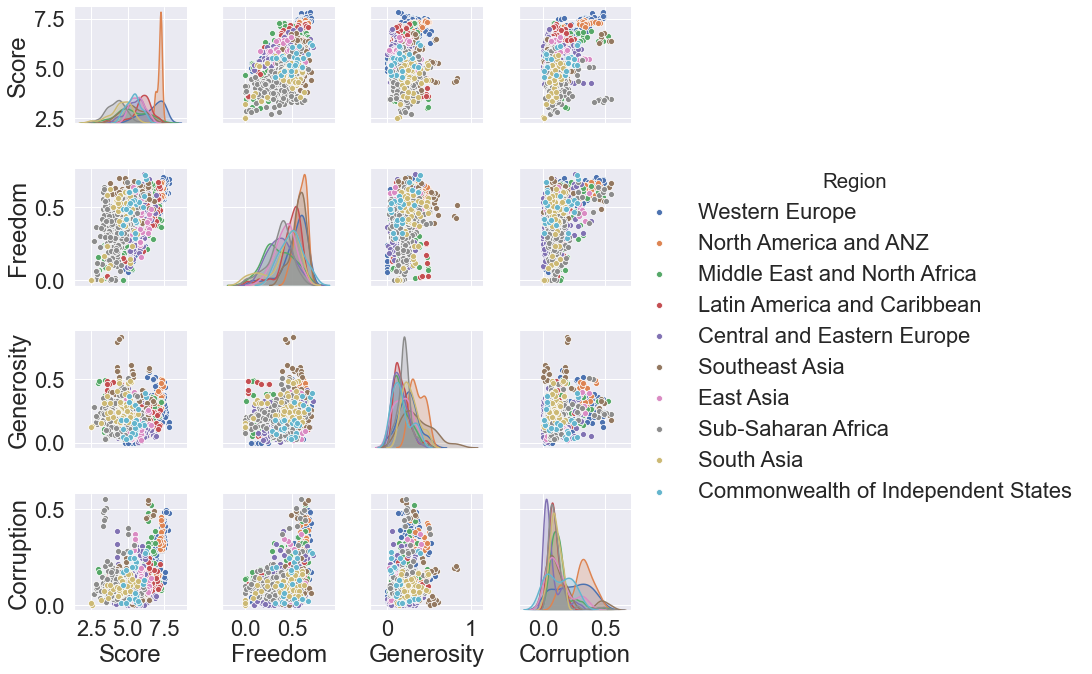

In [7]:
df = hp[['Region','Score', 'Freedom', 'Generosity', 'Corruption']]

sns.pairplot(df, diag_kind='kde', hue='Region')
sns.set(font_scale = 2)
plt.show()

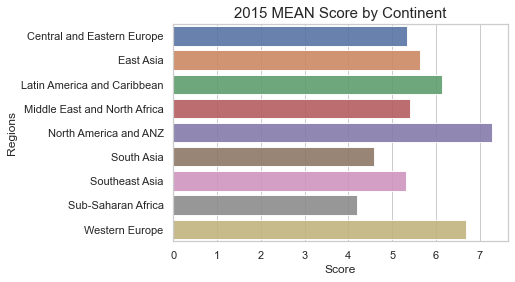

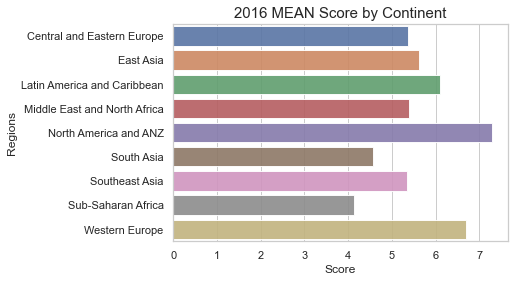

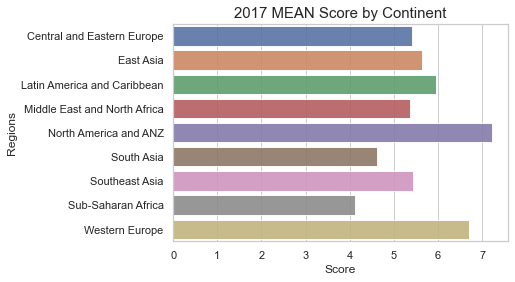

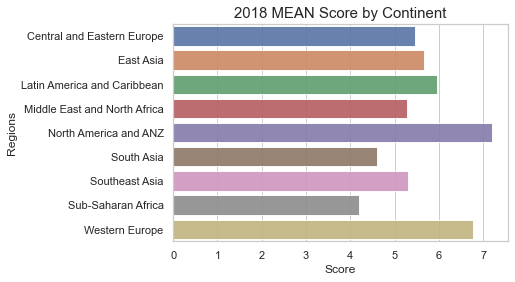

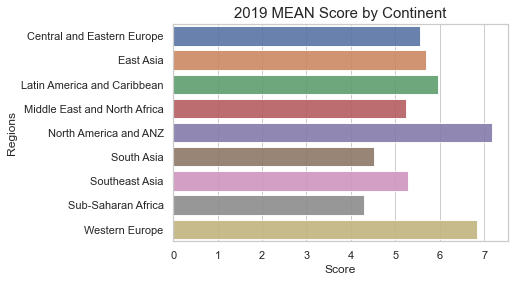

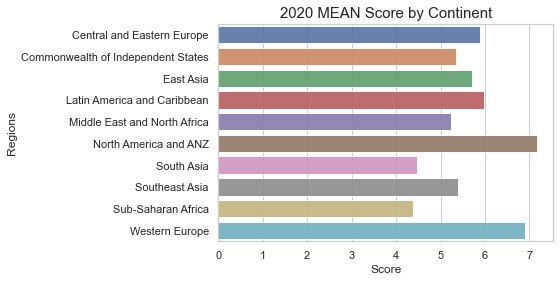

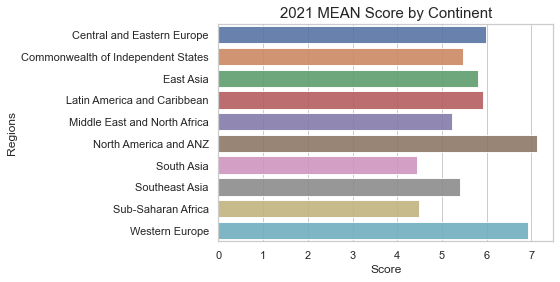

In [8]:
for year in range(2015, 2022):
    reg_data = hp[hp['Year']==year].groupby('Region')['Score'].mean()
    sns.set(style="whitegrid")
    sns.barplot(reg_data.values.tolist(), reg_data.index.tolist(), alpha=0.9)
    plt.title(str(year)+' MEAN Score by Continent', fontsize=15)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.show()

In [9]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [10]:
map_plot = dict(type = 'choropleth', 
                locations = hp['Country'],
                locationmode = 'country names',
                z = hp['Score'], 
                text = hp['Region'],
                colorscale = 'Viridis', reversescale = True)
layout = dict(title = 'Happiest Countries In The World ', 
              geo = dict(showframe = False, 
                         projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [map_plot], layout=layout)
iplot(choromap, validate=False)

In [11]:
year_reg_mean = hp.groupby(['Region', 'Year']).mean()
df_reg_mean = year_reg_mean.xs('Score', axis=1).unstack()
df_reg_mean

Year,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,
Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517,5.883818,5.984765
Commonwealth of Independent States,NaN,NaN,NaN,NaN,NaN,5.358342,5.467000
East Asia,5.626167,5.624167,5.646667,5.672000,5.688833,5.714850,5.810333
Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429,5.981786,5.908050
Middle East and North Africa,5.406900,5.386053,5.369684,5.282737,5.237000,5.227159,5.219765
North America and ANZ,7.279000,7.288750,7.226750,7.202500,7.176250,7.173525,7.128500
South Asia,4.580857,4.563286,4.628429,4.603857,4.526857,4.475443,4.441857
Southeast Asia,5.317444,5.338889,5.444875,5.313444,5.273667,5.383367,5.407556
Sub-Saharan Africa,4.202800,4.136421,4.111949,4.195026,4.300050,4.383495,4.494472


In [12]:
# 인덱스 순서 일치
reg_mean = hp.groupby('Region').mean()
reg_idx = reg_mean.sort_values(by='Score').index
df_reg_mean = df_reg_mean.reindex(reg_idx)
df_reg_mean.dropna(inplace=True)
df_reg_mean

Year,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,
Sub-Saharan Africa,4.202800,4.136421,4.111949,4.195026,4.300050,4.383495,4.494472
South Asia,4.580857,4.563286,4.628429,4.603857,4.526857,4.475443,4.441857
Middle East and North Africa,5.406900,5.386053,5.369684,5.282737,5.237000,5.227159,5.219765
Southeast Asia,5.317444,5.338889,5.444875,5.313444,5.273667,5.383367,5.407556
Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517,5.883818,5.984765
East Asia,5.626167,5.624167,5.646667,5.672000,5.688833,5.714850,5.810333
Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429,5.981786,5.908050
Western Europe,6.689619,6.685667,6.703714,6.781762,6.842190,6.899219,6.914905
North America and ANZ,7.279000,7.288750,7.226750,7.202500,7.176250,7.173525,7.128500


In [13]:
# Creating trace1
trace1 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2015],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red', size=10, opacity = 0.7))

# Creating trace2
trace2 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2016],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'blue', size=10, opacity = 0.7))

# Creating trace3
trace3 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2017],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'green', size=10, opacity = 0.7))

# Creating trace4
trace4 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2018],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black', size=10, opacity = 0.7))

# Creating trace5
trace5 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2019],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink', size=10, opacity = 0.7))

# Creating trace6
trace6 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2020],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = 'yellow', size=10, opacity = 0.7))

# Creating trace7
trace7 = go.Scatter(y = df_reg_mean.index,
                    x = df_reg_mean[2021],
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = 'purple', size=10, opacity = 0.7))

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = dict(title = 'Happiness Score of Regions from 2015 to 2021',
              yaxis= dict(title= 'Regions',zeroline= False),
              xaxis= dict(title= 'Happiness Score',range=[4.0, 7.5], dtick=.2,zeroline= False),
              hovermode="y unified")

fig = dict(data = data, layout = layout)

iplot(fig)

### 행복 지수 증가
- Central and Eastern Europe (큰 폭)
- Sub-Saharan Africa
- East Asia
- Western Europe 

### 행복 지수 감소
- Latin America and Caribbean
- South Asia
- Middle East and North Africa
- North America and ANZ

In [47]:
df_year_mean = year_reg_mean['Score'].unstack(level=0)
df_maxmin = {}
for region in df_year_mean.columns:
     df_maxmin[region] = df_year_mean[region].max() - df_year_mean[region].min()
    
df_maxmin = sorted(df_maxmin.items(), key = lambda item : item[1], reverse=True)
df_maxmin

[('Central and Eastern Europe', 0.6518336713995962),
 ('Sub-Saharan Africa', 0.3825234997741198),
 ('Latin America and Caribbean', 0.23663181818181833),
 ('Western Europe', 0.2292380952380979),
 ('Middle East and North Africa', 0.1871352941176463),
 ('South Asia', 0.18657141848972802),
 ('East Asia', 0.18616666666666593),
 ('Southeast Asia', 0.17120833524068058),
 ('North America and ANZ', 0.16024999999999867),
 ('Commonwealth of Independent States', 0.1086583855833343)]

In [48]:
europe_df = hp[(hp['Region']=='Central and Eastern Europe')]
europe_df.tail()

,Year,Region,Country,Score,Economy,Social,Health,Freedom,Generosity,Corruption
998,2021,Central and Eastern Europe,Bosnia and Herzegovina,5.813,1.032,0.919,0.618,0.395,0.261,0.005
1006,2021,Central and Eastern Europe,Montenegro,5.581,1.155,0.891,0.637,0.397,0.166,0.081
1022,2021,Central and Eastern Europe,Bulgaria,5.266,1.181,1.055,0.583,0.494,0.125,0.005
1027,2021,Central and Eastern Europe,Albania,5.117,1.008,0.529,0.646,0.491,0.168,0.024
1028,2021,Central and Eastern Europe,Macedonia,5.101,1.068,0.772,0.535,0.450,0.212,0.022


In [49]:
europe_df = europe_df.groupby('Year').mean()
europe_df

,Score,Economy,Social,Health,Freedom,Generosity,Corruption
Year,,,,,,,
2015,5.332931,0.942438,1.053042,0.718774,0.358269,0.152264,0.086674
2016,5.370690,1.047537,0.861855,0.631592,0.300528,0.170898,0.088072
2017,5.409931,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620
2018,5.463966,0.989345,1.325862,0.686690,0.398241,0.133000,0.062276
2019,5.561517,1.021069,1.338793,0.809517,0.357517,0.142724,0.061759
2020,5.883818,1.079527,1.311129,0.826199,0.447895,0.131079,0.054702
2021,5.984765,1.213588,0.957235,0.625529,0.505353,0.136353,0.056588


In [50]:
# Creating trace1
trace1 = go.Scatter(x = europe_df.index,
                    y = europe_df['Economy'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red', size=7, opacity = 0.7))

# Creating trace2
trace2 = go.Scatter(x = europe_df.index,
                    y = europe_df['Social'],
                    mode = "lines+markers",
                    name = "Social",
                    marker = dict(color = 'blue', size=7, opacity = 0.7))

# Creating trace3
trace3 = go.Scatter(x = europe_df.index,
                    y = europe_df['Health'],
                    mode = "lines+markers",
                    name = "Health",
                    marker = dict(color = 'green', size=7, opacity = 0.7))

# Creating trace5
trace4 = go.Scatter(x = europe_df.index,
                    y = europe_df['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'pink', size=7, opacity = 0.7))

# Creating trace6
trace5 = go.Scatter(x = europe_df.index,
                    y = europe_df['Generosity'],
                    mode = "lines+markers",
                    name = "Generosity",
                    marker = dict(color = 'yellow', size=7, opacity = 0.7))

# Creating trace7
trace6 = go.Scatter(x = europe_df.index,
                    y = europe_df['Corruption'],
                    mode = "lines+markers",
                    name = "Corruption",
                    marker = dict(color = 'purple', size=7, opacity = 0.7))

data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = dict(title = 'Score of Europe from 2015 to 2021',
              xaxis= dict(title= 'Years',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness Score', zeroline= False),
              hovermode="x unified")

fig = dict(data = data, layout = layout)

iplot(fig)

행복지수와 비슷하게 오른 부분은 Economy 하나라고 밖에 볼 수 없다